In [61]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
PATH = '/Users/aman/workspace/DataMining/HW6/MOVIE/ml-100k'

In [63]:
# loading data
USER_COL = [ 'user_id', 'age', 'gender','occupation','zip_code']
ITEM =  ['movie_id','movie_title','release_date','video_release_date','IMDb URL',
         'unknown','Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
RATING = ['user_id', 'item_id', 'rating','timestamp']
RATING_TEST = ['user_id', 'item_id', 'rating','timestamp']

users = pd.read_csv(filepath_or_buffer="{0}/u.user".format(PATH),sep='|',names=USER_COL)
items =  pd.read_csv(filepath_or_buffer="{0}/u.item".format(PATH),sep='|',names=ITEM)
ratings = pd.read_csv(filepath_or_buffer="{0}/u.data".format(PATH),sep='\t',names=RATING)
# rating_test = pd.read_csv(filepath_or_buffer="{0}/ua.test".format(PATH),sep='\t',names=RATING_TEST)

print 'users',users.shape
print 'items',items.shape
print 'ratings',ratings.shape
# print 'rating_test',test.shape

users (943, 5)
items (1682, 24)
rating (100000, 4)
rating_test (943, 1682)


In [64]:
utility = np.zeros((users.shape[0], items.shape[0]))
for index,r in ratings.iterrows():
    utility[int(r.user_id)-1][int(r.item_id)-1] = int(r['rating'])


In [53]:
# test = np.zeros((users.shape[0], items.shape[0]))
# for index,r in rating_test.iterrows():
#     test[int(r.user_id) - 1][int(r.item_id) - 1] = int(r.rating)

In [72]:
avg_rating = []
variance = []
norm_utility = utility.copy()
for i in range(users.shape[0]):
    rated = np.nonzero(utility[i])
    n = len(rated[0])
    if n != 0:
        mean = np.mean(utility[i][rated])
        var = np.var(utility[i][rated])
        avg_rating.append(mean)
        variance.append(var)
        norm_utility[i][rated] = (utility[i][rated]-mean)/ var
    else:
        avg_rating.append(0)
        variance.append(0)
avg,var = pd.Series(avg_rating),pd.Series(variance)
users['avg_rating'],users['variance']  = avg.values,var.values
users

,user_id,age,gender,occupation,zip_code,avg_rating,variance
0,1,24,M,technician,85711,3.610294,1.590776
1,2,53,F,other,94043,3.709677,1.044745
2,3,23,M,writer,32067,2.796296,1.458505
3,4,24,M,technician,43537,4.333333,0.805556
4,5,33,F,other,15213,2.874286,1.847053
5,6,42,M,executive,98101,3.635071,1.075358
6,7,57,M,administrator,91344,3.965261,1.130307
7,8,36,M,administrator,05201,3.796610,1.517955
8,9,29,M,student,01002,4.272727,0.834711
9,10,53,M,lawyer,90703,4.206522,0.337784


In [79]:
# Perform clustering on items
# movie_genre = []
# print('# movies ',len(ITEM[5:]))
# cluster = KMeans(n_clusters=19)
# cluster.fit_predict(items[ITEM[5:]])
# utility_clustered = []
# for i in range(0, users.shape[0]):
#     average = np.zeros(19)
#     tmp = []
#     for m in range(0, 19):
#         tmp.append([])
#     for j in range(0, items.shape[0]):
#         if utility[i][j] != 0:
#             tmp[cluster.labels_[j] - 1].append(utility[i][j])
#     for m in range(0, 19):
#         if len(tmp[m]) != 0:
#             average[m] = np.mean(tmp[m])
#         else:
#             average[m] = 0
#     utility_clustered.append(average)

# utility_clustered = np.array(utility_clustered)
# print utility_clustered.shape,utility.shape,norm_utility.shape
# for i in range(0, 2):
#     x = utility_clustered[i]
#     print sum(a for a in x if a > 0) / sum(a > 0 for a in x)

(943, 19) (943, 1682) (943, 1682)
3.5637118570470974
3.684027777777778


![Screen%20Shot%202018-04-24%20at%208.47.16%20PM.png](attachment:Screen%20Shot%202018-04-24%20at%208.47.16%20PM.png)

In [119]:
sim_matrix = np.empty((users.shape[0], users.shape[0]))
def cal_sim(i,j):
    if i==j:
        return 1
    index_m_i = np.nonzero(norm_utility[i])[0]
    index_m_j = np.nonzero(norm_utility[j])[0]
    index = [m for m in index_m_i if m in index_m_j]
    val = 0
    if len(index):
        val = np.sum(np.multiply(norm_utility[i][index],norm_utility[j][index]))/len(index)
    sim = val
    return sim
for i in range(1,users.shape[0]+1):
    for j in range(i):
        sim_matrix[i-1][j] = sim_matrix[j][i-1] = cal_sim(i-1,j)
        

In [122]:
sim_matrix.shape

(943, 943)

In [173]:
def prediction(k,u,m):
    ind = np.argpartition(sim_matrix[u-1], -k)[-k:]
    mu =  users.iloc[u-1].avg_rating
    sigma =  users.iloc[u-1].variance 
    r = mu + sigma * (np.sum(np.multiply(sim_matrix[u-1][ind],norm_utility[ind,[m]])))/np.sum(sim_matrix[u-1][ind])
    return r
                 

In [175]:
ratings[(ratings.user_id == 196) & (ratings.item_id==242)]


,user_id,item_id,rating,timestamp
0,196,242,3,881250949


In [218]:
from random import randint
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = []
rmse = []
x = []
for k in range(0,50,5):
    if k==0:
        k=1
    y_true = []
    y_pred = []
    for i in range(100):
        r = ratings.iloc[randint(0, ratings.shape[0])]
        y_true.append(r.rating)
        y_pred.append(prediction(k,r.user_id,r.item_id))
    mse.append(mean_squared_error(y_true,y_pred))  
    rmse.append(sqrt(mean_squared_error(y_true, y_pred)))
    x.append(k)

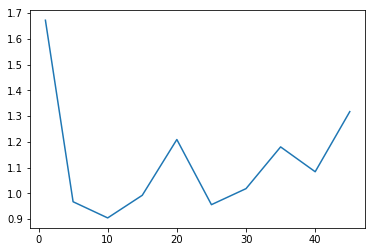

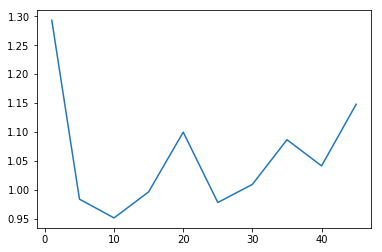

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(x, mse)
plt.figure(2)
plt.plot(x, rmse)

plt.show()
